In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [17]:

image1=cv.imread(r"C:\Users\Azista Industries\OneDrive\Desktop\2572024\Images\Part1.jpg",1)
image2=cv.imread(r"C:\Users\Azista Industries\OneDrive\Desktop\2572024\Images\Part2.jpg", 1)

In [18]:
max_features=500
orb=cv.ORB_create(max_features)
keypoints1, descriptors1 = orb.detectAndCompute(image1,None)
keypoints2, descriptors2 = orb.detectAndCompute(image2,None)
image1_display=cv.drawKeypoints(image1,keypoints1, outImage=np.array([]),color=(255,0,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_display=cv.drawKeypoints(image2,keypoints2, outImage=np.array([]),color=(255,0,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

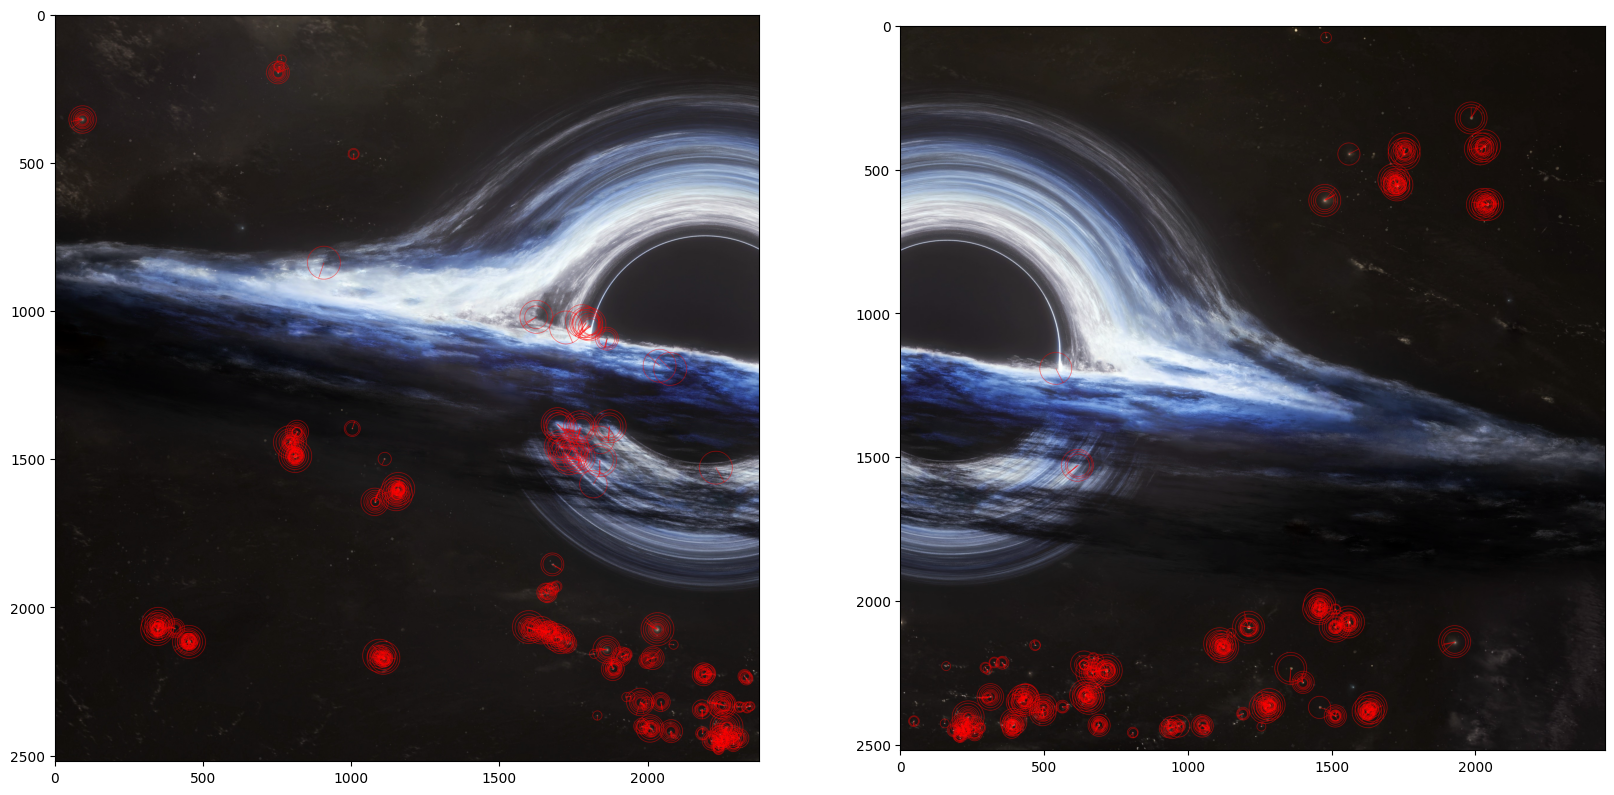

In [19]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(image1_display)
plt.subplot(122);plt.imshow(image2_display)


In [20]:
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_BRUTEFORCE_HAMMING)
matches=list(matcher.match(descriptors1,descriptors2,None))
matches.sort(key=lambda x: x.distance, reverse=False)
numGoodMatches=int(len(matches)*0.1)
matches=matches[:numGoodMatches]

(np.float64(-0.5), np.float64(4828.5), np.float64(2519.5), np.float64(-0.5))

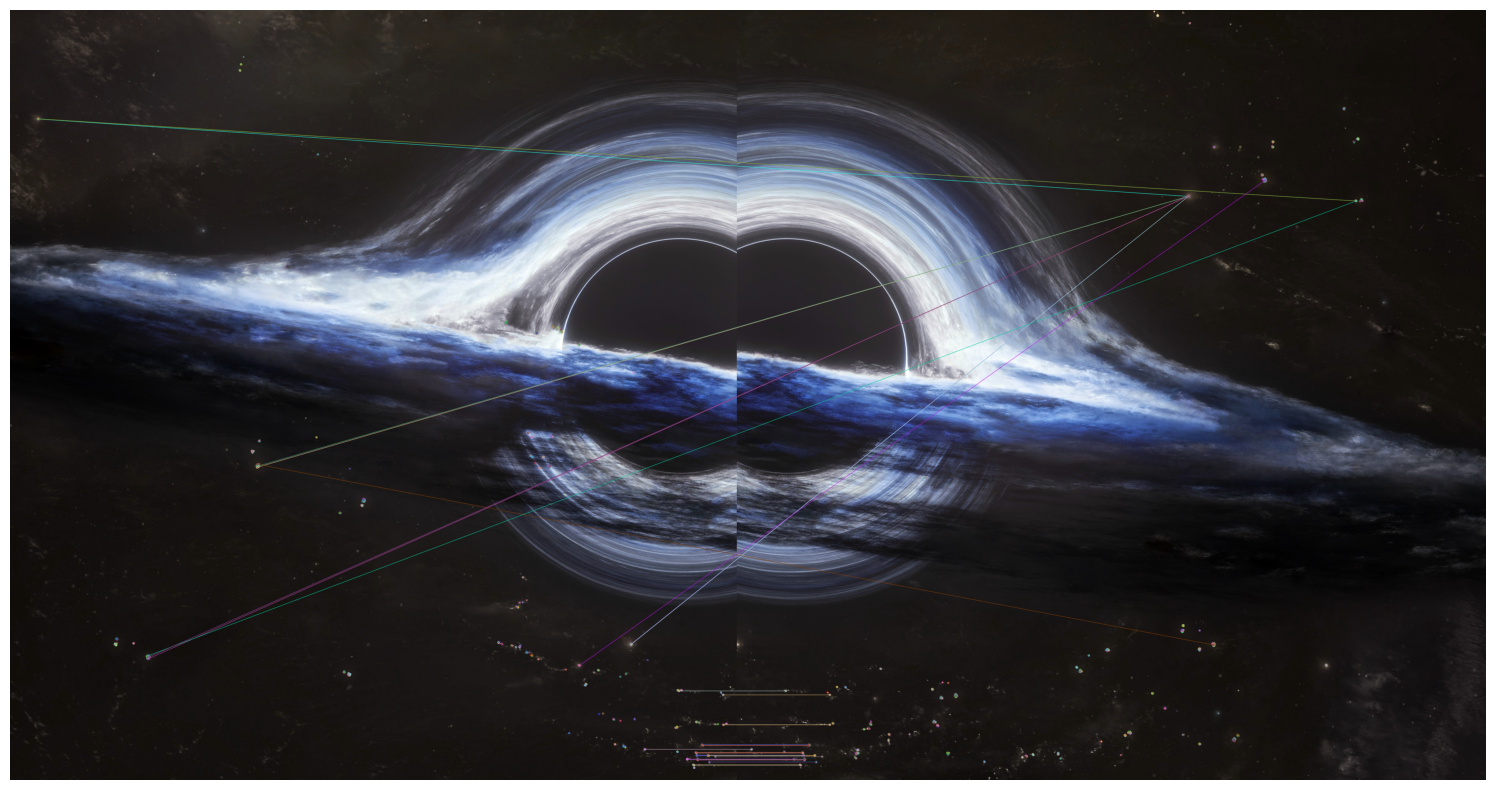

In [21]:
im_matches = cv.drawMatches(image1,keypoints1,image2, keypoints2,matches, None)
plt.figure(figsize=[40,10])
plt.imshow(im_matches)
plt.axis('off')

In [22]:
points1 = np.zeros((len(matches),2), dtype=np.float32)
points2 = np.zeros((len(matches),2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.queryIdx].pt
h,mask = cv.findHomography(points2,points1, cv.RANSAC)

Text(0.5, 1.0, 'Scanned Form')

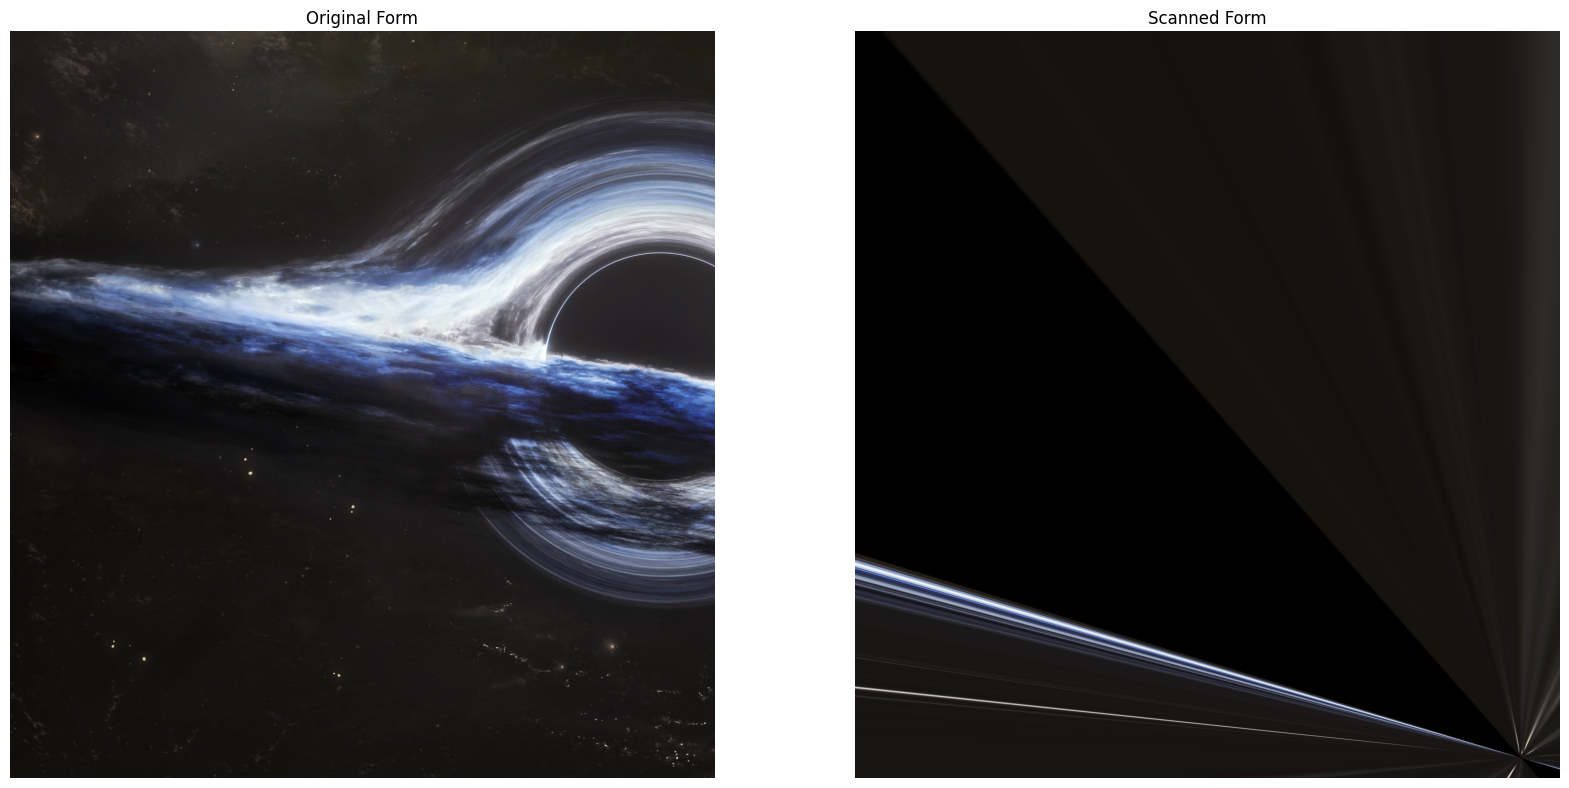

In [23]:

height, width, channels = image1.shape
im2_reg = cv.warpPerspective(image2, h, (width, height))


plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(image1);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")

In [24]:
image1.shape

(2520, 2378, 3)

## Panorama


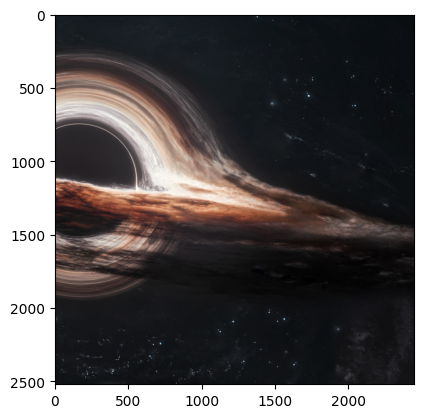

In [37]:
image1=cv.cvtColor(image1, cv.COLOR_BGR2RGB)
image2=cv.cvtColor(image2, cv.COLOR_BGR2RGB)
Stitcher=cv.Stitcher_create()
status,stitched_image = Stitcher.stitch(image1,image2)
plt.imshow(stitched_image)

In [38]:
cv.imshow("Stitched Image", stitched_image)
cv.waitKey(0)
cv.destroyAllWindows()